In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/julihdez36/Inteligencia_artificial/main/Forbes%202000%202022.csv", encoding= "latin-1", sep= ";" )

In [65]:
print(df.shape)
print(df.columns)

(2000, 8)
Index(['ï»¿Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')


In [66]:
df.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value', 'Unnamed: 7']
df.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value', 'Unnamed: 7'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Company       2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         2000 non-null   object 
 4   Profits       2000 non-null   object 
 5   Assets        2000 non-null   object 
 6   Market_value  2000 non-null   object 
 7   Unnamed: 7    0 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [68]:
df.describe()

,Rank,Unnamed: 7
count,2000.000000,0.0
mean,1000.500000,NaN
std,577.494589,NaN
min,1.000000,NaN
25%,500.750000,NaN
50%,1000.500000,NaN
75%,1500.250000,NaN
max,2000.000000,NaN


In [69]:
df= df.replace(',','',regex= True) # regex: expresión regular
df = df.replace('\$','',regex=True)#La expresión regular de $ es con \$


In [70]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profits'] = pd.to_numeric(df['Profits'], errors='coerce')#corregimos los datos para que sean numericos

In [71]:
print(df['Sales'].isnull().sum())#verificamos que no hayan datos nulos

0


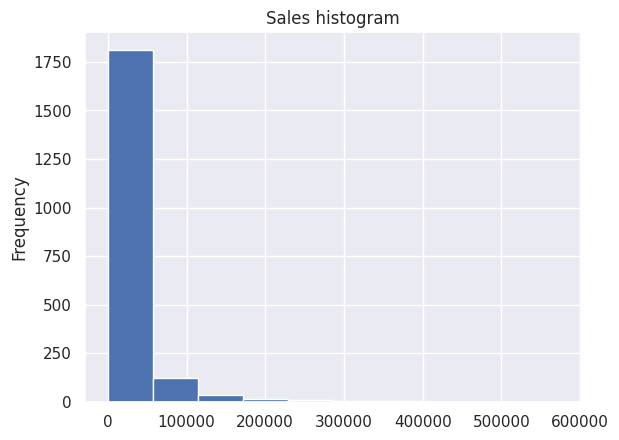

In [72]:
# Analisis de ventas
x = df['Sales'].plot(kind='hist')
plt.title('Sales histogram')
plt.show()

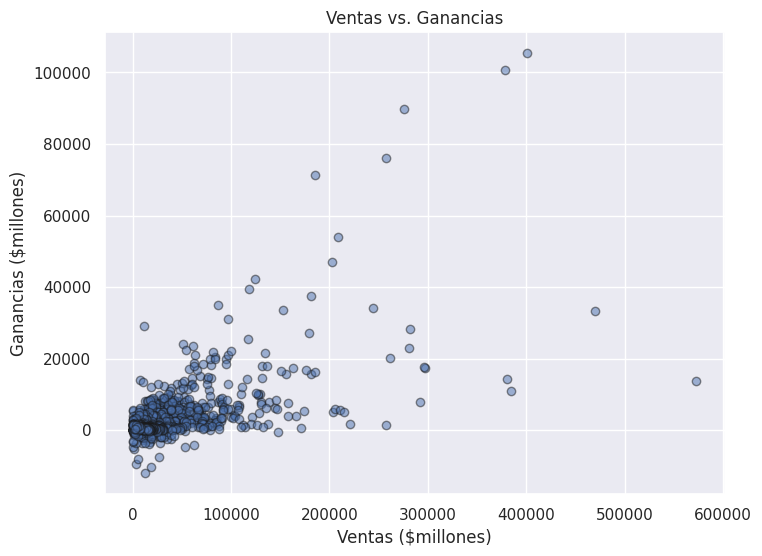

In [73]:
plt.figure(figsize=(8, 6))
plt.title('Ventas vs. Ganancias')
plt.scatter(x=df['Sales'], y=df['Profits'], alpha=0.5, c='b', edgecolors='k')
plt.xlabel('Ventas ($millones)')
plt.ylabel('Ganancias ($millones)')
plt.show()

In [74]:
df.drop('Unnamed: 7', axis=1, inplace=True) #eliminamos esta columna porque en el paso anterior indica que todo lo que abarca el dataframe estan nulos.

In [75]:
# Eliminamos filas con valores nulos
df.dropna(inplace=True)

In [76]:
from sklearn.preprocessing import StandardScaler
# Selecciona solo las columnas numéricas para la estandarización
numeric_columns = df.select_dtypes(include=[np.number])

# Escala las columnas numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_columns)

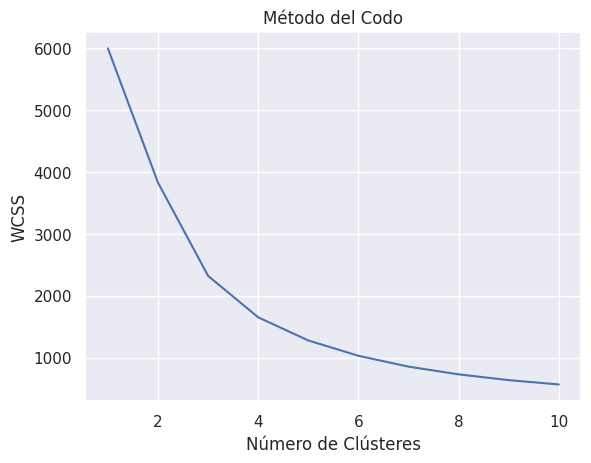

In [77]:
from sklearn.cluster import KMeans
# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotea el gráfico del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')  # Suma de los cuadrados de las distancias
plt.show()


In [78]:
kmeans_model = KMeans(n_clusters=5, init='k-means++',random_state=0)

In [79]:
df.dtypes

Rank             int64
Company         object
Country         object
Sales            int64
Profits          int64
Assets          object
Market_value    object
dtype: object

In [80]:
# Elimina columnas no numéricas para poder entrenar el modelo Kmeans
df = df[['Rank', 'Sales', 'Profits']].dropna()

In [81]:
df.columns

Index(['Rank', 'Sales', 'Profits'], dtype='object')

In [85]:
df.dtypes

Rank       int64
Sales      int64
Profits    int64
dtype: object

In [86]:
kmeans_model = KMeans(n_clusters=3, init='k-means++',random_state=0)

In [87]:
# Prediction

y = kmeans_model.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
len(y)
print(y)

[2 2 2 ... 0 0 0]


In [89]:
pd.Series(y).value_counts()

0    1799
1     178
2      23
dtype: int64

In [90]:
# Centroid points
kmeans_model.cluster_centers_

array([[1.08980934e+03, 1.36436076e+04, 1.48905225e+03],
       [2.19915730e+02, 9.21971348e+04, 9.03029775e+03],
       [5.60000000e+01, 2.95483913e+05, 3.12195652e+04]])

<ipython-input-91-5479b1e2e143>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Sales', y='Profits', data=df, palette = "viridis")


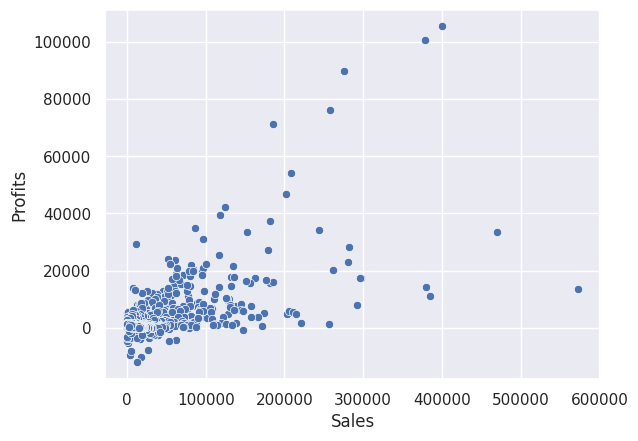

In [91]:
#View data points before clustering them

sns.scatterplot(x='Sales', y='Profits', data=df, palette = "viridis")
plt.show()


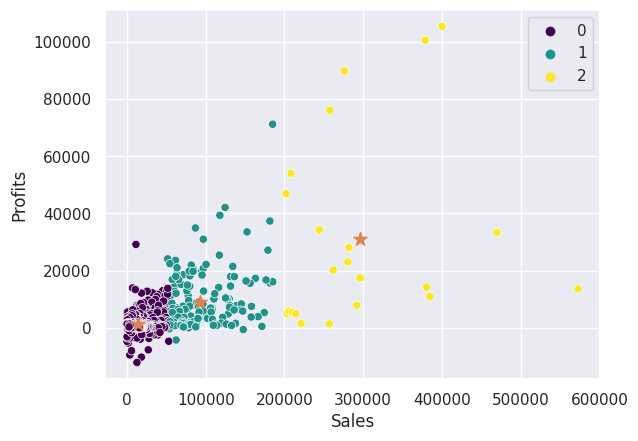

In [93]:
# Kmeans
sns.scatterplot(x='Sales', y='Profits', hue=y, data=df, palette="viridis")
plt.scatter(kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 2], marker='*', s=100)
plt.show()

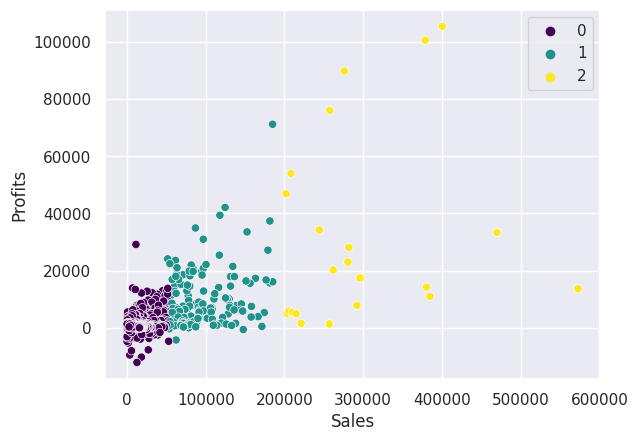

In [94]:
sns.scatterplot(x='Sales', y='Profits', hue= y, data=df, palette = "viridis")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


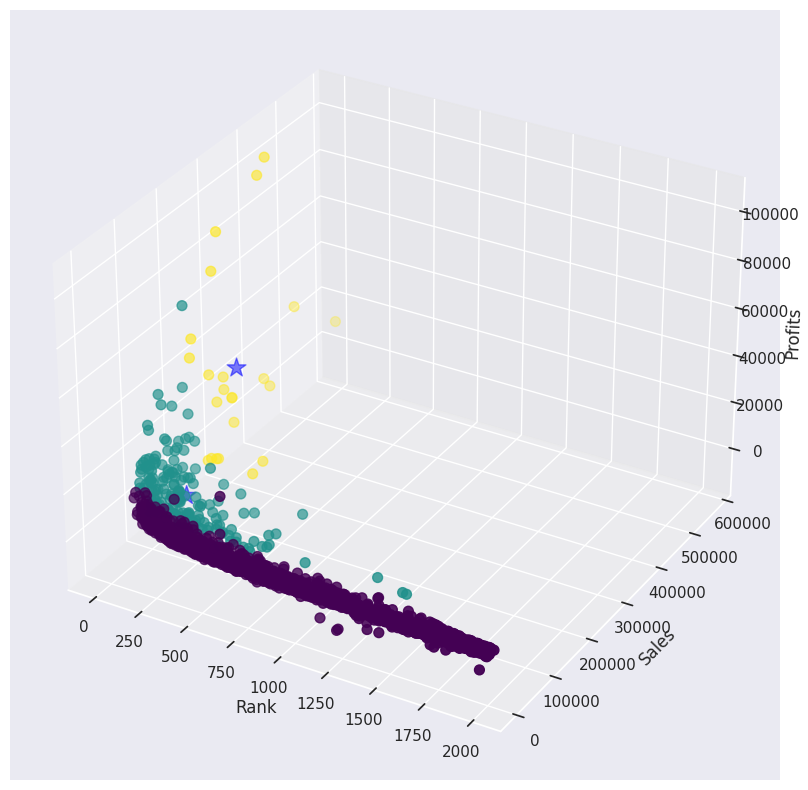

In [99]:
clusters = kmeans_model.fit_predict(df[['Rank', 'Sales', 'Profits']])# Ajustamos el modelo K-Means con las columnas 'Rank', 'Sales' y 'Profits'
# Agrega la columna de clusters al DataFrame
df['Cluster'] = clusters
# Visualización en 3D de 'Rank', 'Sales' y 'Profits' con colores según el cluster
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Puntos de datos
ax.scatter(df['Rank'], df['Sales'], df['Profits'], c=df['Cluster'], cmap='viridis', s=50)

# Centroides
ax.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 2], c='blue', marker='*', s=200, alpha=0.5)

ax.set_xlabel('Rank')
ax.set_ylabel('Sales')
ax.set_zlabel('Profits')

plt.show()